In [2]:
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
import os
import gc
import io
import csv
import requests
import pandas as pd
from decimal import Decimal

base_path = '/opt/hawkeye'
def get_asx_df():
    asx_url = 'https://www.asx.com.au/asx/research/ASXListedCompanies.csv'
    asx_data = requests.get(asx_url).content
    asx_df = pd.read_csv(io.StringIO(asx_data.decode('utf-8')), skiprows=1)

    return asx_df


df = get_asx_df()
df.head()

,Company name,ASX code,GICS industry group
0,MOQ LIMITED,MOQ,Software & Services
1,1300 SMILES LIMITED,ONT,Health Care Equipment & Services
2,1414 DEGREES LIMITED,14D,Capital Goods
3,1ST GROUP LIMITED,1ST,Health Care Equipment & Services
4,333D LIMITED,T3D,Commercial & Professional Services


In [11]:
labels=df['GICS industry group'].unique()
counts=[len(df[df['GICS industry group'] == x]) for x in labels]
print(labels)
print(counts)

['Software & Services' 'Health Care Equipment & Services' 'Capital Goods'
 'Commercial & Professional Services' 'Real Estate' 'Not Applic' 'Energy'
 'Materials' 'Consumer Services'
 'Semiconductors & Semiconductor Equipment' 'Communication Services'
 'Diversified Financials' 'Media & Entertainment' 'Retailing'
 'Transportation' 'Food, Beverage & Tobacco'
 'Pharmaceuticals, Biotechnology & Life Sciences'
 'Automobiles & Components' 'Technology Hardware & Equipment' 'Utilities'
 'Household & Personal Products' 'Consumer Durables & Apparel' 'Insurance'
 'Banks' 'Class Pend' 'Food & Staples Retailing']
[153, 87, 83, 57, 81, 263, 182, 684, 56, 9, 23, 100, 68, 57, 19, 56, 83, 9, 38, 28, 11, 22, 14, 17, 13, 4]


Of the 2185 stocks listed on the ASX, around 33% are junior metals and mining stocks by number, yet the entire listed Materials sector accounts for only 15% of the ASX by index weight. In contrast, financials only account for 5% of the number of stocks listed, yet is the largest sector in terms market capitalisation; accounting for 36% of the index.

Stocks are classified into sectors according to their major business type.

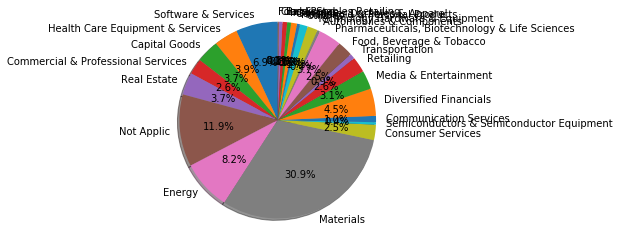

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [50]:
def get_asx_200_df():
    asx_url = 'https://www.asx200list.com/uploads/csv/20190501-asx200.csv'
    asx_data = requests.get(asx_url).content
    asx_df = pd.read_csv(
        io.StringIO(asx_data.decode('utf-8')),
        skiprows=1,
        usecols=['Code', 'Company', 'Sector', 'Market Cap', 'Weight(%)'],
        dtype={"Weight(%)": "float32"})

    return asx_df


df200 = get_asx_200_df()
df200["Market Cap"]=pd.to_numeric(df200["Market Cap"].apply(lambda x: x.replace(',','')))
df200.head()

,Code,Company,Sector,Market Cap,Weight(%)
0,ABP,Abacus Property Group FP Ordinary/Units Staple...,Real Estate,2188690000,0.12
1,ABC,Adelaide Brighton,Materials,2821960000,0.15
2,APT,Afterpay Touch,Information Technology,6111980000,0.34
3,AGL,AGL Energy Limited,Utilities,14579000000,0.80
4,ALQ,Als Limited,Industrials,3854980000,0.21


In [58]:
labels=df200['Sector'].unique()
counts=[len(df200[df200['Sector'] == x]) for x in labels]
print(labels)
print(counts)

['Real Estate' 'Materials' 'Information Technology' 'Utilities'
 'Industrials' 'Financials' 'Health Care' 'Consumer Discretionary'
 'Energy' 'Consumer Staples' 'Telecommunication Services']
[20, 39, 15, 4, 21, 27, 14, 29, 11, 14, 6]


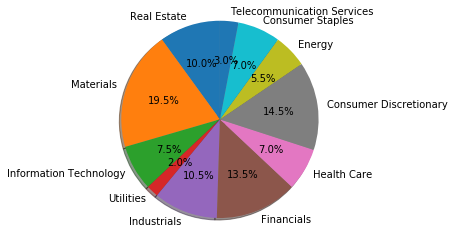

In [59]:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [56]:
df200.sort_values('Weight(%)', ascending=False).head(20)

,Code,Company,Sector,Market Cap,Weight(%)
51,CBA,Commonwealth Bank,Financials,131918000000,7.24
29,BHP,BHP Group Limited,Materials,110175000000,6.05
190,WBC,Westpac Banking Corp,Financials,94842700000,5.20
58,CSL,CSL Limited,Health Care,89972300000,4.94
10,ANZ,ANZ Banking Group Limited,Financials,77062400000,4.23
114,NAB,National Aust. Bank,Financials,71266800000,3.91
110,MQG,Macquarie Group Limited,Financials,45849600000,2.52
195,WOW,Woolworths Group Limited,Consumer Staples,41959800000,2.30
192,WES,Wesfarmers Limited,Consumer Discretionary,40829600000,2.24
180,TLS,Telstra Corporation,Telecommunication Services,40199300000,2.21


In [55]:
df200.sort_values('Market Cap', ascending=False).head(20)

,Code,Company,Sector,Market Cap,Weight(%)
51,CBA,Commonwealth Bank,Financials,131918000000,7.24
29,BHP,BHP Group Limited,Materials,110175000000,6.05
190,WBC,Westpac Banking Corp,Financials,94842700000,5.20
58,CSL,CSL Limited,Health Care,89972300000,4.94
10,ANZ,ANZ Banking Group Limited,Financials,77062400000,4.23
114,NAB,National Aust. Bank,Financials,71266800000,3.91
110,MQG,Macquarie Group Limited,Financials,45849600000,2.52
195,WOW,Woolworths Group Limited,Consumer Staples,41959800000,2.30
192,WES,Wesfarmers Limited,Consumer Discretionary,40829600000,2.24
180,TLS,Telstra Corporation,Telecommunication Services,40199300000,2.21
